# Preliminaries

Importing python packages and setting display parameters

In [1]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
plt.style.use('bmh')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)

# Fitness Landscape Definition

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

In [4]:
#Testing the minimum
print(f(-1,-1))

0.0


In [5]:
#Testing the function
print(f(-1.,-1.), f(-11.,-9.), f(11.,3.), f(-6.01717,9.06022))

0.0 2.941368139329697 2.082094654525758 2.040654385424956


# Setting up the experiment
6 Experiment
>L-> In each experiment, one factor will be varied through its levels or categories. Other factors stay at default value.
>>L-> 40 Replicate per experiment.
>>>L-> Each replicate is different due to randomness effects.

## Common parameters

In [6]:
#starting seed
np.random.seed(42)

In [7]:
#Algorithm parameters
## Number of replicates, and generations per experiment
rep_n = 40
gen_f = 200

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'fitness_proportional_selection'
b = 3
par_s = b * pop_s

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'uniform'
### Mutation method, probability and size
mutation = 'random_all_gau_dis'
mut_p = 0.5
mut_s = 2.5

## Survivors (New population) selection method
sur_selection = 'tournament_k3'

## Initializing data storage

In [8]:
mult_fit_cols = ['exp'] + ['pop_s'] + ['b'] + ['mut_p'] + ['mut_s'] + ['p_sel'] + ['s_sel'] + ['run', 'seed', 'generation', 'fitness_min', 'fitness_max', 'fitness_mean', 'fitness_std']
multi_fit = pd.DataFrame(columns=mult_fit_cols)
multi_fit = multi_fit.infer_objects()

# Running the experiment

## 1st experiment: Varying population size (Factor pop_s)

### Parameter setting

In [9]:
# Experiment number
exp_n = 1

In [10]:
# Factor levels
pop_s_levels = [10, 20, 40, 80, 160]

### Executing the experiment

In [11]:
%%time

for level in pop_s_levels:
    pop_s = level
    
    fitness_res = EA_exp_only_fitness(rep_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, sur_selection)
    
    fitness_res.insert(0, 's_sel', sur_selection)
    fitness_res.insert(0, 'p_sel', par_selection)
    fitness_res.insert(0, 'mut_s', mut_s)
    fitness_res.insert(0, 'mut_p', mut_p)
    fitness_res.insert(0, 'b', b)
    fitness_res.insert(0, 'pop_s', pop_s)
    fitness_res.insert(0, 'exp', exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

CPU times: user 11min 39s, sys: 4.91 s, total: 11min 44s
Wall time: 11min 43s


In [12]:
# Resetting the factor to its default value
pop_s = 20

In [13]:
#b = 3
#prog_s = int(b * pop_s)
#par_s = prog_s

## 2nd experiment: Varying progeny-to-population ratio (Factor b)

### Parameter setting

In [14]:
# Experiment number
exp_n = 2

In [15]:
# Factor levels
b_levels = [0.5, 1, 2, 3, 5]

### Executing the experiment

In [16]:
%%time

for level in b_levels:
    b = level
    prog_s = int(b * pop_s)
    par_s = prog_s
    
    fitness_res = EA_exp_only_fitness(rep_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, sur_selection)
    
    fitness_res.insert(0, 's_sel', sur_selection)
    fitness_res.insert(0, 'p_sel', par_selection)
    fitness_res.insert(0, 'mut_s', mut_s)
    fitness_res.insert(0, 'mut_p', mut_p)
    fitness_res.insert(0, 'b', b)
    fitness_res.insert(0, 'pop_s', pop_s)
    fitness_res.insert(0, 'exp', exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

CPU times: user 9min 50s, sys: 4.36 s, total: 9min 55s
Wall time: 9min 53s


In [17]:
# Resetting the factor to its default value
b = 3
prog_s = int(b * pop_s)
par_s = prog_s

## 3rd experiment: Varying mutation probability (Factor mut_p)

### Parameter setting

In [18]:
# Experiment number
exp_n = 3

In [19]:
# Factor levels
mut_p_levels = [0.1, .25, .5, .75, .9]

### Executing the experiment

In [20]:
%%time

for level in mut_p_levels:
    mut_p = level
    
    fitness_res = EA_exp_only_fitness(rep_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, sur_selection)
    
    fitness_res.insert(0, 's_sel', sur_selection)
    fitness_res.insert(0, 'p_sel', par_selection)
    fitness_res.insert(0, 'mut_s', mut_s)
    fitness_res.insert(0, 'mut_p', mut_p)
    fitness_res.insert(0, 'b', b)
    fitness_res.insert(0, 'pop_s', pop_s)
    fitness_res.insert(0, 'exp', exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

CPU times: user 9min 53s, sys: 4.69 s, total: 9min 57s
Wall time: 9min 56s


In [21]:
# Resetting the factor to its default value
mut_p = 0.5

## 4th experiment: Varying mutation strength (Factor mut_s)

### Parameter setting

In [22]:
# Experiment number
exp_n = 4

In [23]:
# Factor levels
mut_s_levels = [0.5, 1.25, 2.5, 5, 7.5, 15]

### Executing the experiment

In [ ]:
%%time

for level in mut_s_levels:
    mut_s = level
    
    fitness_res = EA_exp_only_fitness(rep_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, sur_selection)
    
    fitness_res.insert(0, 's_sel', sur_selection)
    fitness_res.insert(0, 'p_sel', par_selection)
    fitness_res.insert(0, 'mut_s', mut_s)
    fitness_res.insert(0, 'mut_p', mut_p)
    fitness_res.insert(0, 'b', b)
    fitness_res.insert(0, 'pop_s', pop_s)
    fitness_res.insert(0, 'exp', exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

CPU times: user 11min 54s, sys: 5.46 s, total: 12min
Wall time: 11min 58s


In [ ]:
# Resetting the factor to its default value
mut_s = 2.5

## 5th experiment: Varying parent selection (Factor p_sel)

### Parameter setting

In [ ]:
# Experiment number
exp_n = 5

In [ ]:
# Factor levels
p_sel_levels = ['truncation', 'fitness_proportional_selection', 'tournament_k3', 'uniform']

### Executing the experiment

In [ ]:
%%time

for level in p_sel_levels:
    par_selection = level
    
    fitness_res = EA_exp_only_fitness(rep_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, sur_selection)
    
    fitness_res.insert(0, 's_sel', sur_selection)
    fitness_res.insert(0, 'p_sel', par_selection)
    fitness_res.insert(0, 'mut_s', mut_s)
    fitness_res.insert(0, 'mut_p', mut_p)
    fitness_res.insert(0, 'b', b)
    fitness_res.insert(0, 'pop_s', pop_s)
    fitness_res.insert(0, 'exp', exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

CPU times: user 8min 37s, sys: 5.5 s, total: 8min 42s
Wall time: 8min 41s


In [ ]:
# Resetting the factor to its default value
par_selection = 'fitness_proportional_selection'

## 6th experiment: Varying survivors selection (Factor s_sel)

### Parameter setting

In [ ]:
# Experiment number
exp_n = 6

In [ ]:
# Factor levels
s_sel_levels = ['truncation', 'fitness_proportional_selection', 'tournament_k3', 'uniform']

### Executing the experiment

In [ ]:
%%time

for level in s_sel_levels:
    sur_selection = level
    
    fitness_res = EA_exp_only_fitness(rep_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, sur_selection)
    
    fitness_res.insert(0, 's_sel', sur_selection)
    fitness_res.insert(0, 'p_sel', par_selection)
    fitness_res.insert(0, 'mut_s', mut_s)
    fitness_res.insert(0, 'mut_p', mut_p)
    fitness_res.insert(0, 'b', b)
    fitness_res.insert(0, 'pop_s', pop_s)
    fitness_res.insert(0, 'exp', exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

CPU times: user 8min 5s, sys: 5 s, total: 8min 10s
Wall time: 8min 8s


In [ ]:
# Resetting the factor to its default value
sur_selection = 'tournament_k3'

## Data storage

Writing the Data Frame to a pickle file

In [ ]:
multi_fit.to_pickle('./TEST_A_OFAT.gz', compression='gzip')

Reading the Data Frame from a pickle file

In [ ]:
multi_fit = pd.read_pickle('./TEST_A_OFAT.gz', compression='gzip')

# Visualization

In [43]:
factors = ['pop_s'] + ['b'] + ['mut_p'] + ['mut_s'] + ['p_sel'] + ['s_sel']
factors

['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']

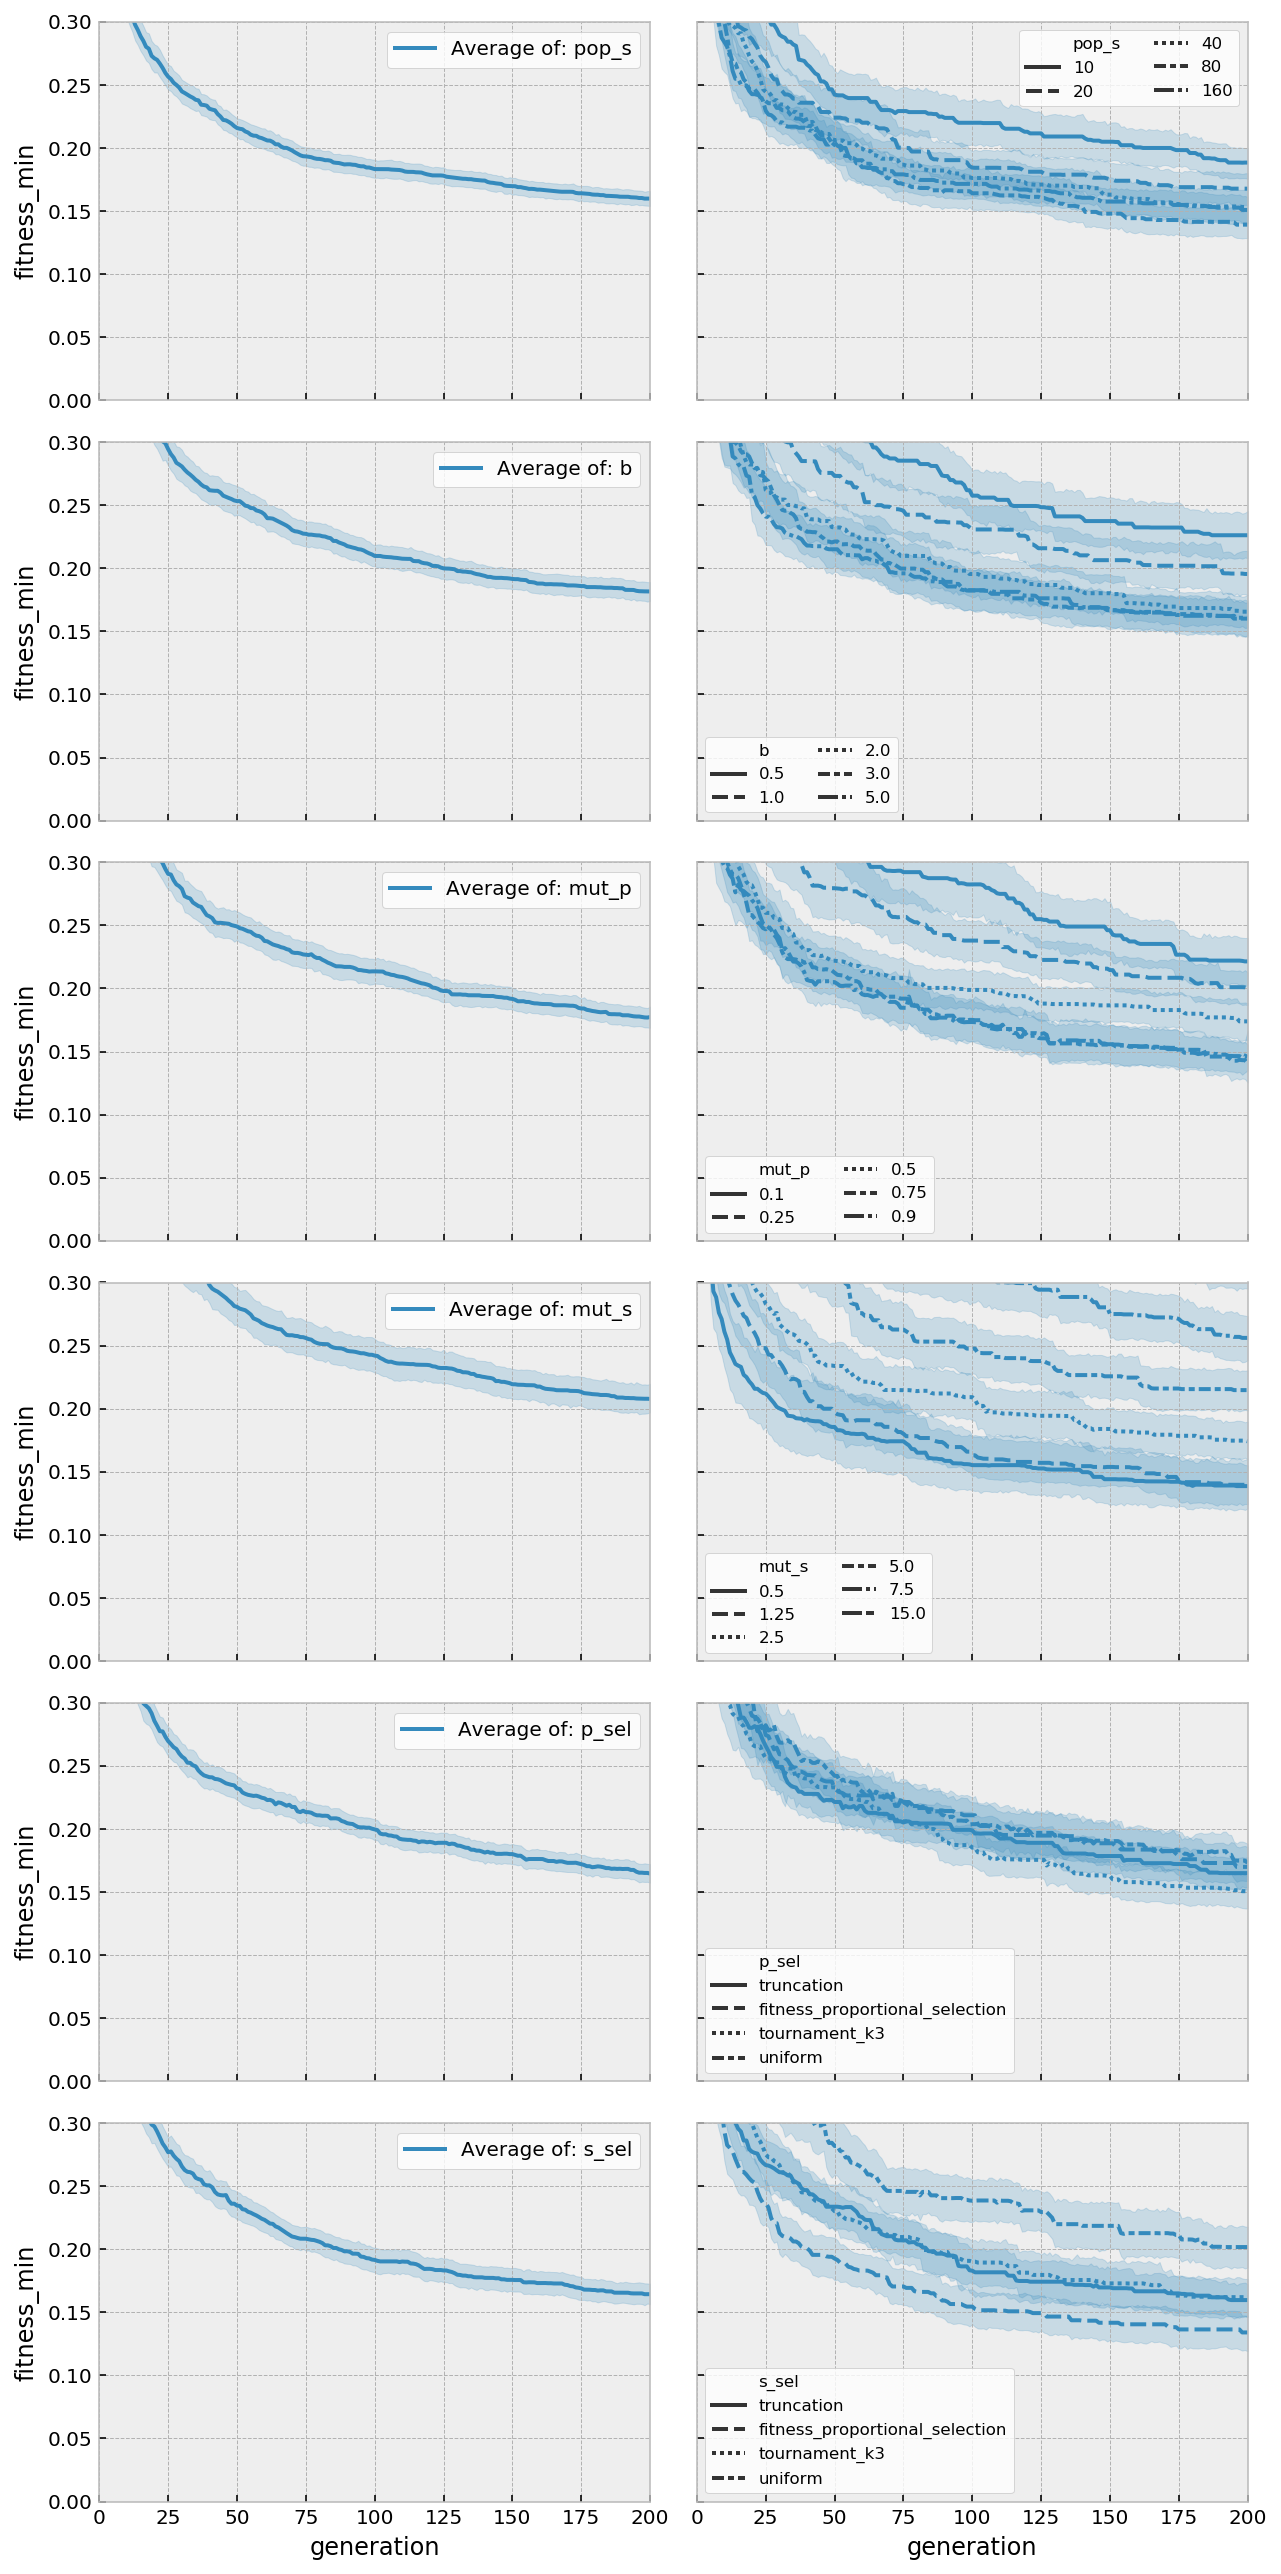

CPU times: user 3min 18s, sys: 3.4 s, total: 3min 21s
Wall time: 3min 19s


In [48]:
%%time

fig, axs = plt.subplots(6, 2, figsize=(9, 18), sharey=True, sharex=True)

for i in range(6):
    query = (multi_fit['exp']==(i+1))
    sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[i,0], label=('Average of: '+factors[i]))
    sns.lineplot(x='generation', y='fitness_min', style=factors[i], data=multi_fit[query], ax=axs[i,1])
    axs[i,0].legend(facecolor='white')
    if i>3:
        axs[i,1].legend(ncol=1, facecolor='white', fontsize='small')
    else:
        axs[i,1].legend(ncol=2, facecolor='white', fontsize='small')

axs[0,0].set_ylim((0, .3))
axs[0,0].set_xlim((0, 200))
    
plt.tight_layout()
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


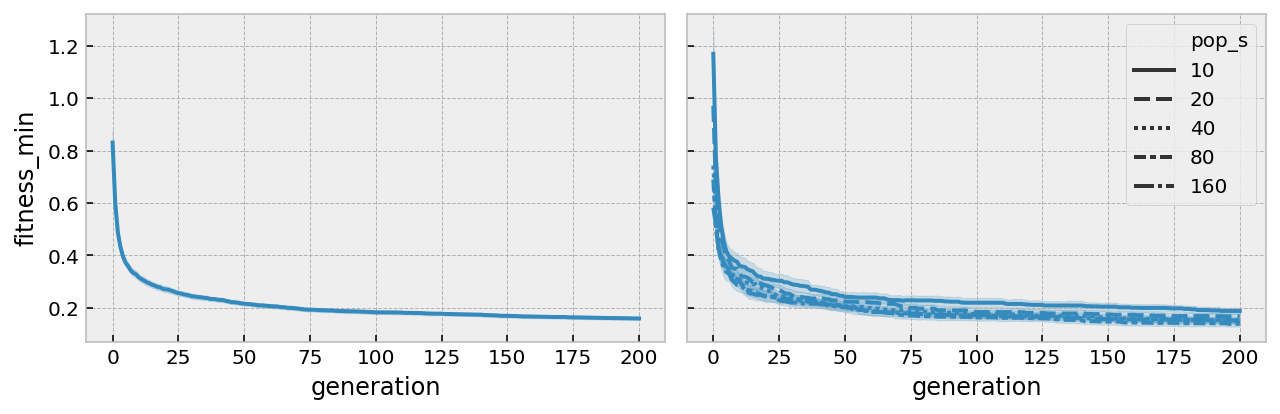

In [ ]:
query = (multi_fit['exp']==1)
fig, axs = plt.subplots(1, 2, figsize=(9,3), sharey = True)
sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[0])
sns.lineplot(x='generation', y='fitness_min', style='pop_s', data=multi_fit[query], ax=axs[1])
plt.tight_layout()

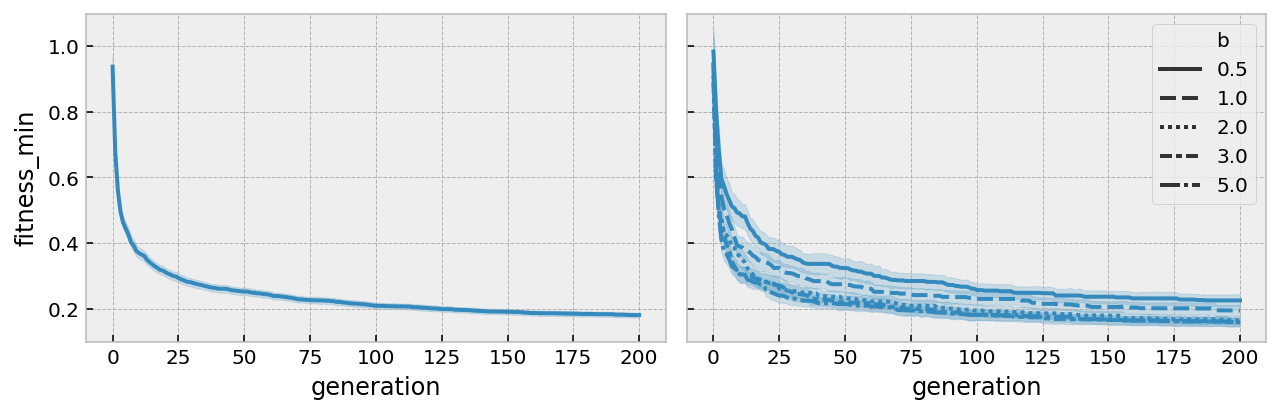

In [ ]:
query = (multi_fit['exp']==2)
fig, axs = plt.subplots(1, 2, figsize=(9,3), sharey = True)
sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[0])
sns.lineplot(x='generation', y='fitness_min', style='b', data=multi_fit[query], ax=axs[1])
plt.tight_layout()

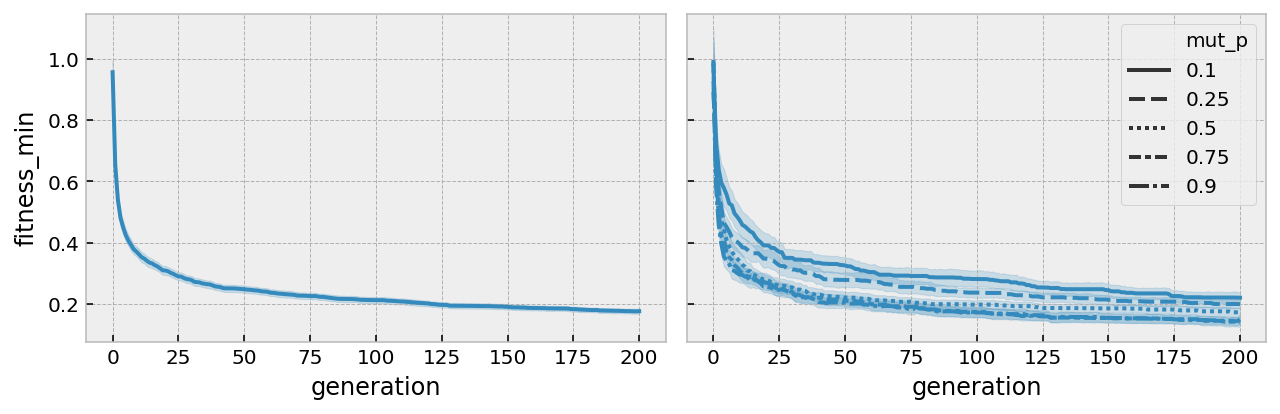

In [ ]:
query = (multi_fit['exp']==3)
fig, axs = plt.subplots(1, 2, figsize=(9,3), sharey = True)
sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[0])
sns.lineplot(x='generation', y='fitness_min', style='mut_p', data=multi_fit[query], ax=axs[1])
plt.tight_layout()

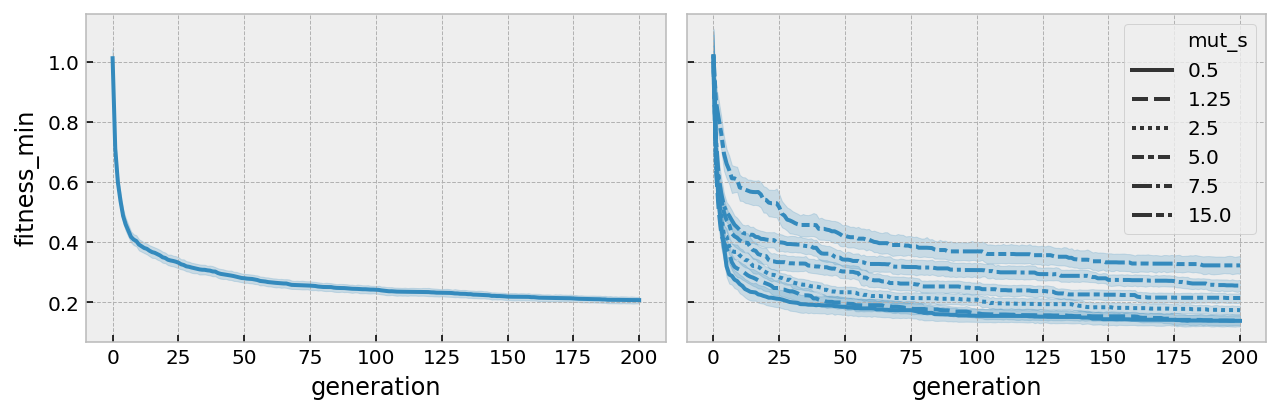

In [ ]:
query = (multi_fit['exp']==4)
fig, axs = plt.subplots(1, 2, figsize=(9,3), sharey = True)
sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[0])
sns.lineplot(x='generation', y='fitness_min', style='mut_s', data=multi_fit[query], ax=axs[1])
plt.tight_layout()

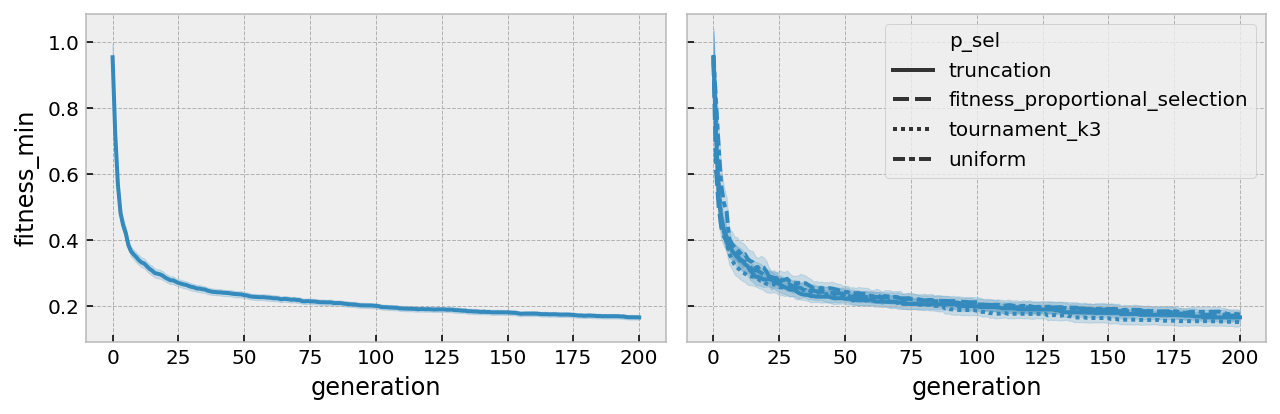

In [ ]:
query = (multi_fit['exp']==5)
fig, axs = plt.subplots(1, 2, figsize=(9,3), sharey = True)
sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[0])
sns.lineplot(x='generation', y='fitness_min', style='p_sel', data=multi_fit[query], ax=axs[1])
plt.tight_layout()

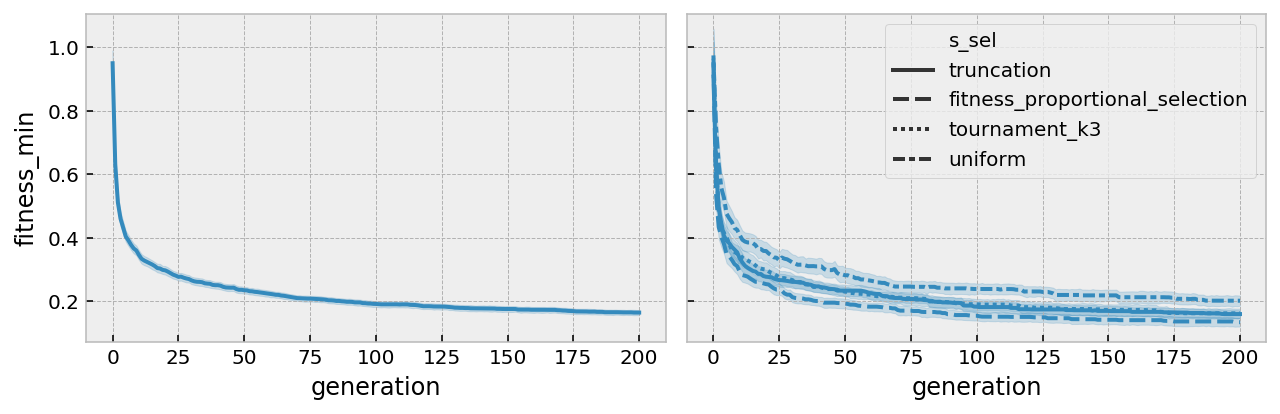

In [ ]:
query = (multi_fit['exp']==6)
fig, axs = plt.subplots(1, 2, figsize=(9,3), sharey = True)
sns.lineplot(x='generation', y='fitness_min', data=multi_fit[query], ax=axs[0])
sns.lineplot(x='generation', y='fitness_min', style='s_sel', data=multi_fit[query], ax=axs[1])
plt.tight_layout()